In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.max_columns', None)

In [164]:
data1 = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1, nrows = 122)

In [165]:
data1['Region'] = 'Bejaia'

In [166]:
data1.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,Bejaia
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,Bejaia
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,Bejaia
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,Bejaia
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia


In [167]:
data2 = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 125, nrows = 122)

In [168]:
data2['Region'] = 'Sidi-Bel Abbes'

In [169]:
data2.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
118,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
121,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [219]:
data1.append(data2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
118,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [370]:
data = data1.append(data2)
data.reset_index(inplace = True, drop = True )
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [371]:
pd.DataFrame({'nulls': data.isnull().sum(), 'data_types': data.dtypes, 'unique_variables': [len(data[feature].unique()) for feature in data.columns]})


,nulls,data_types,unique_variables
day,0,int64,31
month,0,int64,4
year,0,int64,1
Temperature,0,int64,19
RH,0,int64,62
Ws,0,int64,18
Rain,0,float64,39
FFMC,0,float64,173
DMC,0,float64,166
DC,0,object,213


In [372]:
#Change the columns data types

'''print(pd.DataFrame(data['DC'].str.replace(' ', '')) )          
x = pd.DataFrame(data['DC'].str.replace(' ', ''))
x.head(30)
pd.DataFrame(data['DC'])
'''
data.loc[data['DC']=='14.6 9','DC']='14.69'
data['DC'].apply(lambda x: float(x))



0       7.6
1       7.6
2       7.1
3       6.9
4      14.2
       ... 
239    44.5
240     8.0
241     7.9
242    15.2
243    16.5
Name: DC, Length: 244, dtype: float64

In [373]:
#Change the columns data types

data.loc[data['FWI']=='fire   ', 'FWI']= np.NaN
data.loc[data['FWI']=='fire   ', 'Classes  ']='fire'
data['FWI'].apply(lambda x: float(x))

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [374]:
#Change the columns data types

data['DC'] = data['DC'].astype('float64')
data['FWI'] = data['FWI'].astype('float64')
print(data[['FWI']].info())
print(data[['DC']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FWI     243 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC      244 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB
None


In [375]:
column_ord = data.columns 
column_ord
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [376]:
column_ord = list(map(lambda x: x.strip(), column_ord))
column_ord

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

In [377]:
data.columns = column_ord

In [378]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [379]:
data.rename(columns={'day':'Day', 'month':'Month', 'year':'Year', 'RH':'Humidity', 'Ws': 'Wind', 'ISI':'Spread', 'BUI': 'Buildup', 'FWI':'Weather' }, inplace = True)

In [383]:
dt_obj = data.select_dtypes(['object'])

data[dt_obj.columns] = dt_obj.apply(lambda x: x.str.rstrip())

In [381]:
column_ord = data.columns
column_ord = ['Day', 'Month', 'Year', 'Temperature', 'Humidity', 'Wind', 'Rain',
       'FFMC', 'DMC', 'DC', 'Spread', 'Buildup', 'Weather',
       'Region', 'Classes']
data = data[column_ord]

In [384]:
pd.DataFrame({'nulls': data.isnull().sum(), 'data_types': data.dtypes, 'unique_variables': [len(data[feature].unique()) for feature in data.columns]})

,nulls,data_types,unique_variables
Day,0,int64,31
Month,0,int64,4
Year,0,int64,1
Temperature,0,int64,19
Humidity,0,int64,62
Wind,0,int64,18
Rain,0,float64,39
FFMC,0,float64,173
DMC,0,float64,166
DC,0,float64,198


In [389]:
#Drop the year column which has just year 2012
df = data.copy()
data.drop(columns = 'Year', axis = 1, inplace = True)

In [390]:
data['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

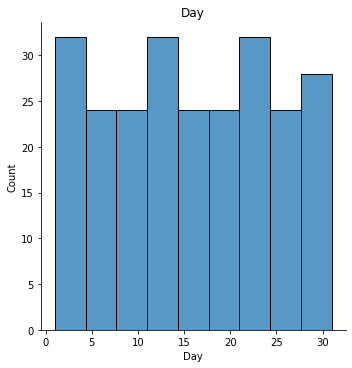

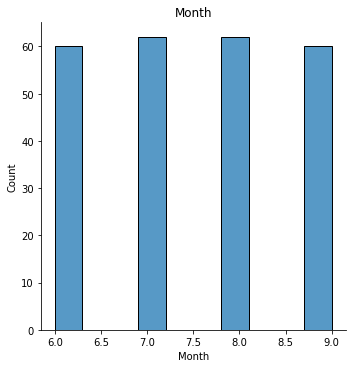

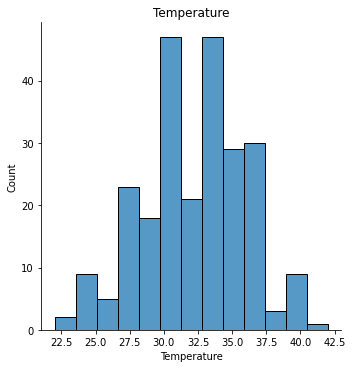

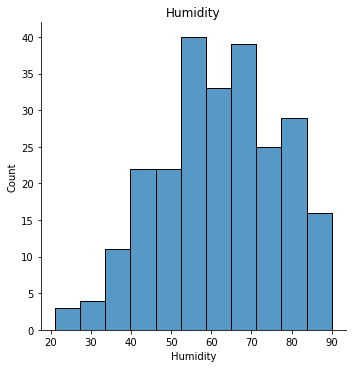

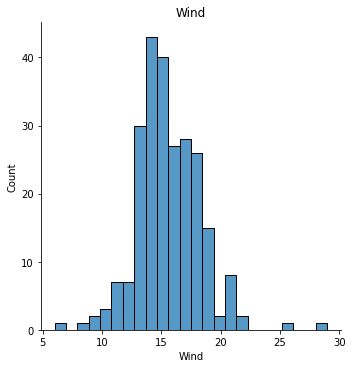

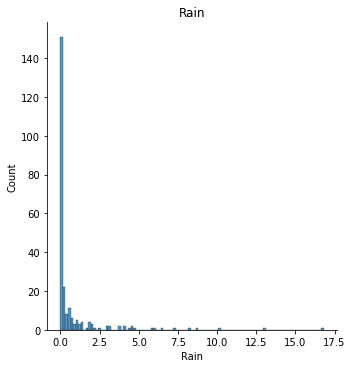

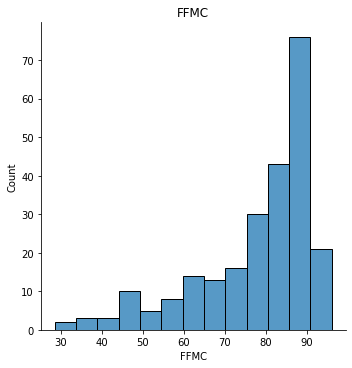

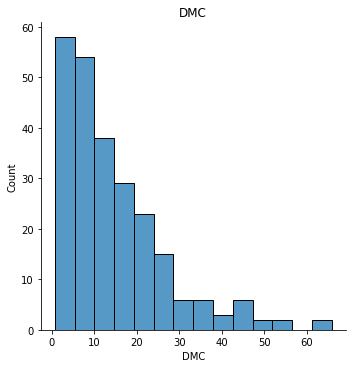

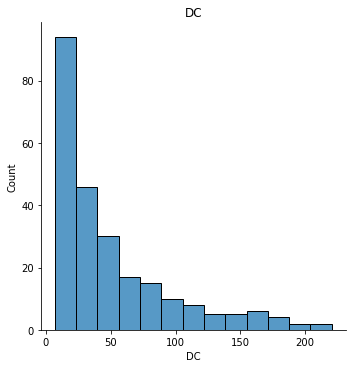

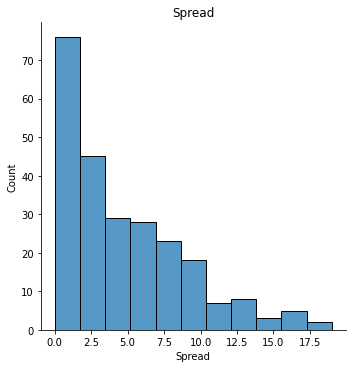

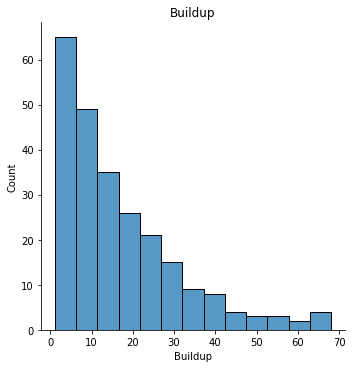

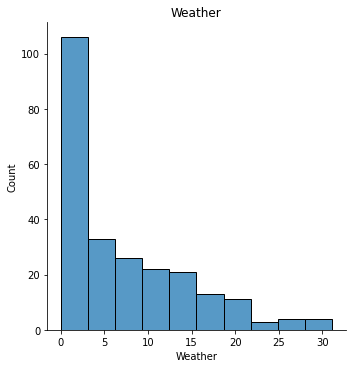

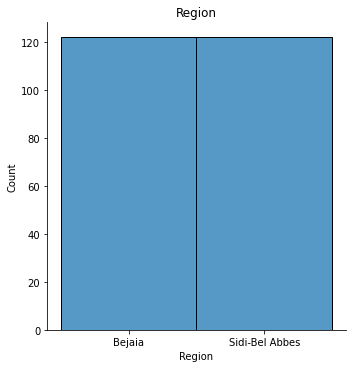

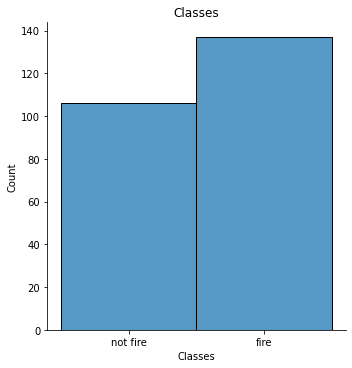

In [391]:
df = data.copy()
for feature in df.columns:
    sns.displot(df[feature])
    plt.title(feature)
    plt.show()

In [402]:
numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'object']

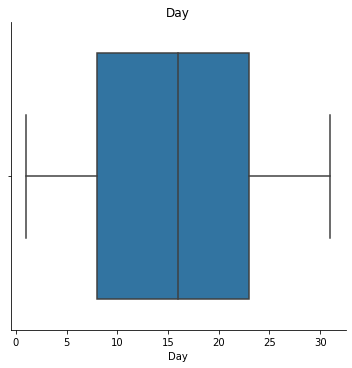

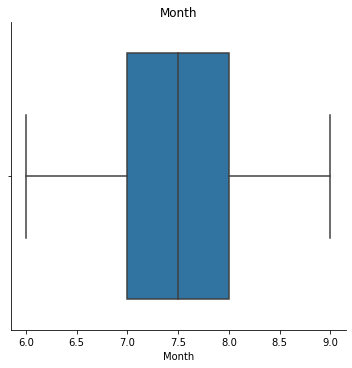

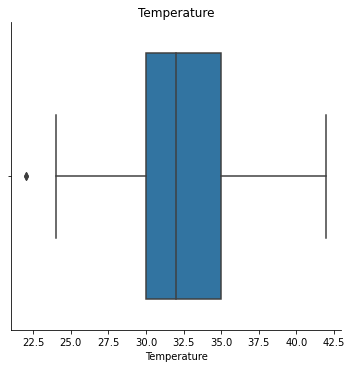

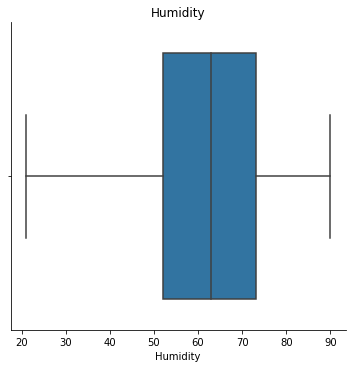

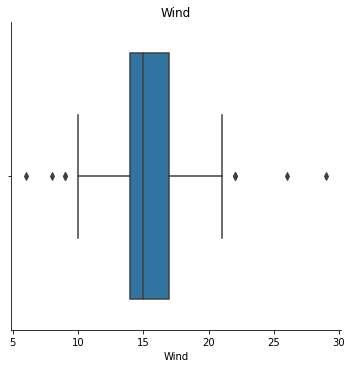

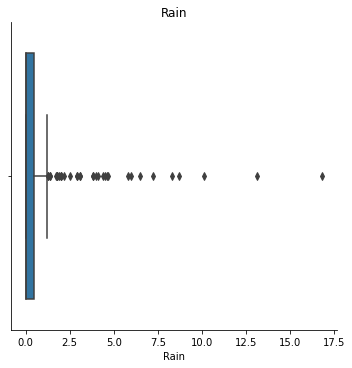

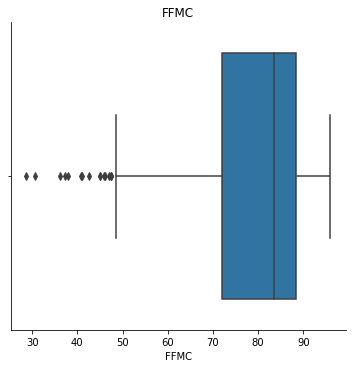

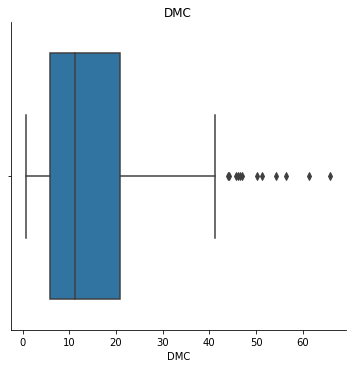

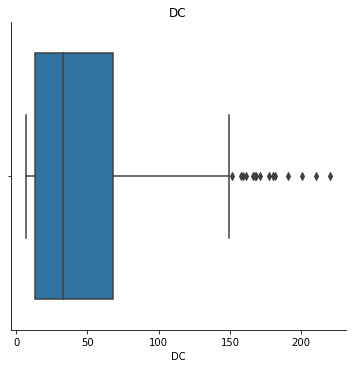

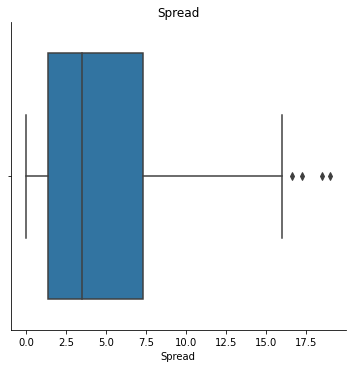

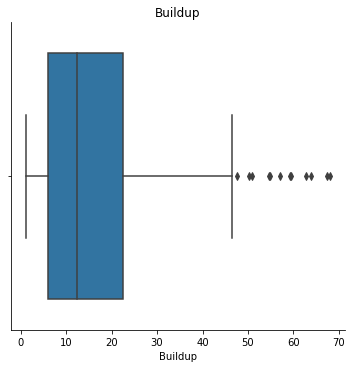

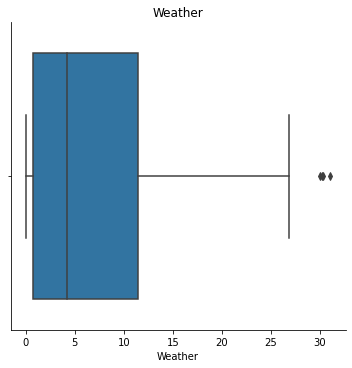

In [413]:
for feature in numeric_features:
    sns.catplot( feature, kind = 'box',  data = df)
    plt.title(feature)
    plt.show()

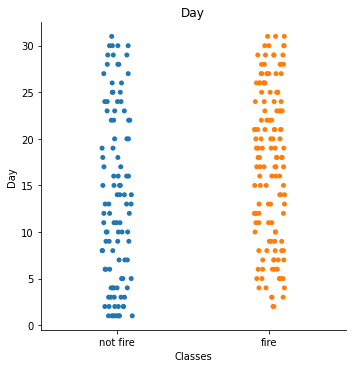

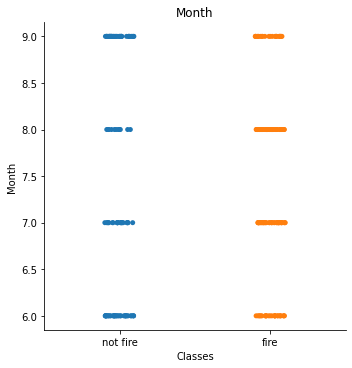

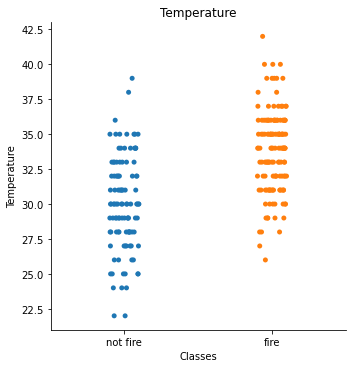

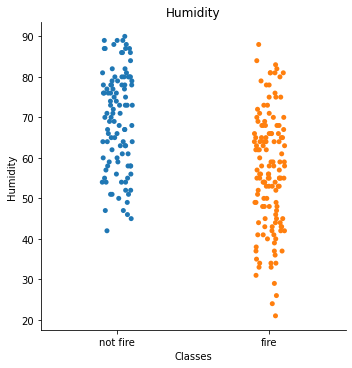

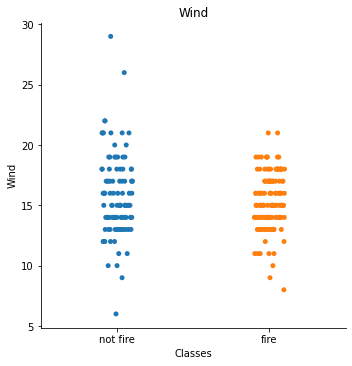

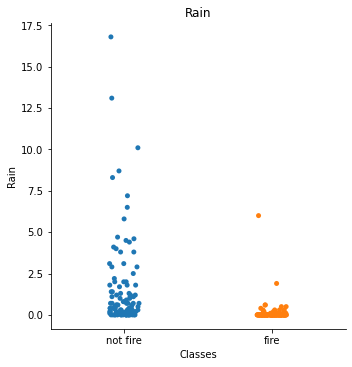

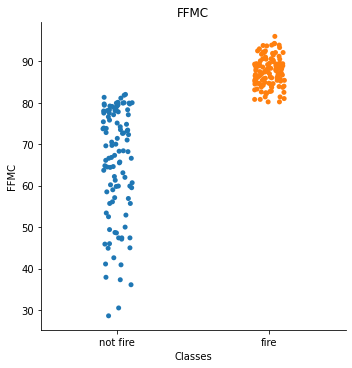

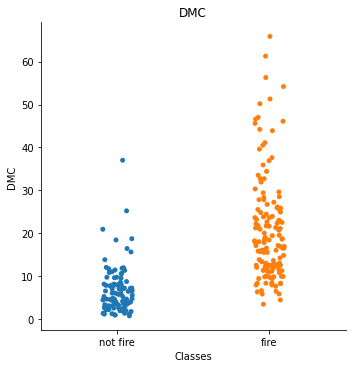

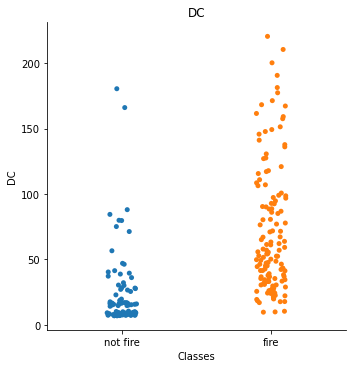

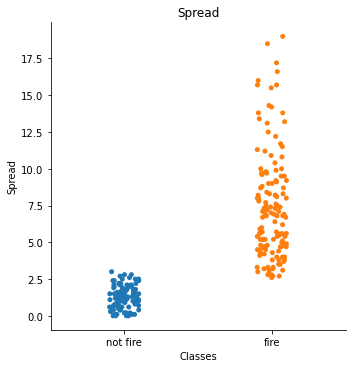

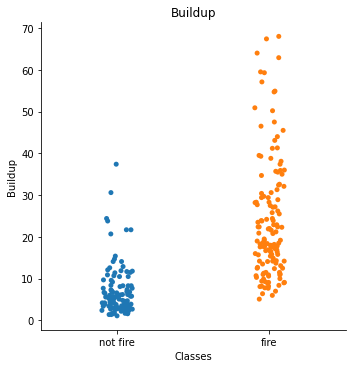

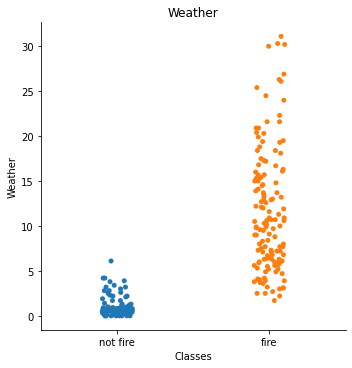

In [410]:
for feature in numeric_features:
    sns.catplot(y = feature, x = 'Classes',  data = df)
    plt.title(feature)
    plt.show()

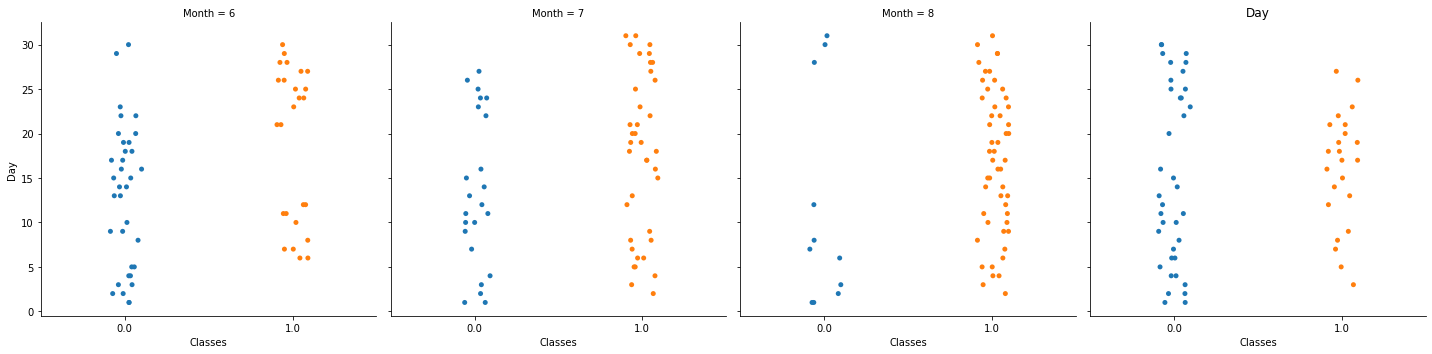

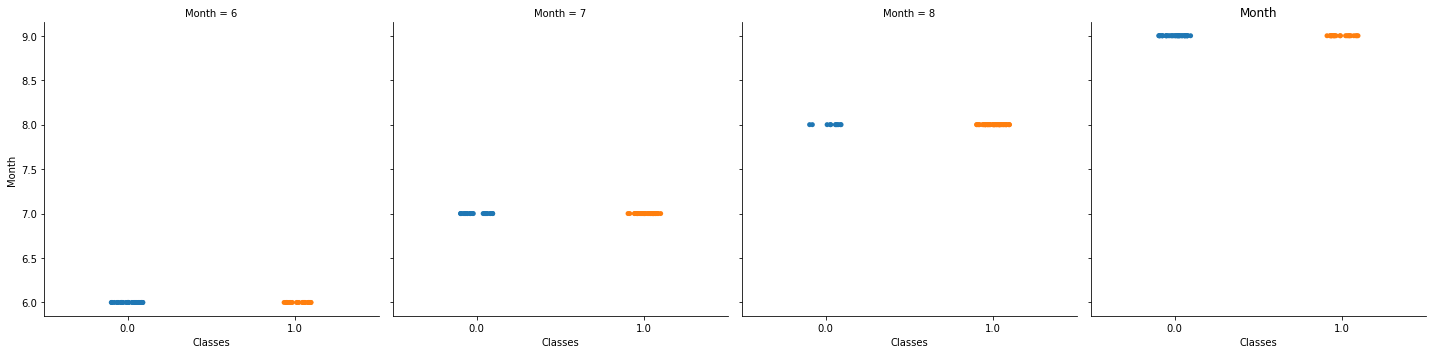

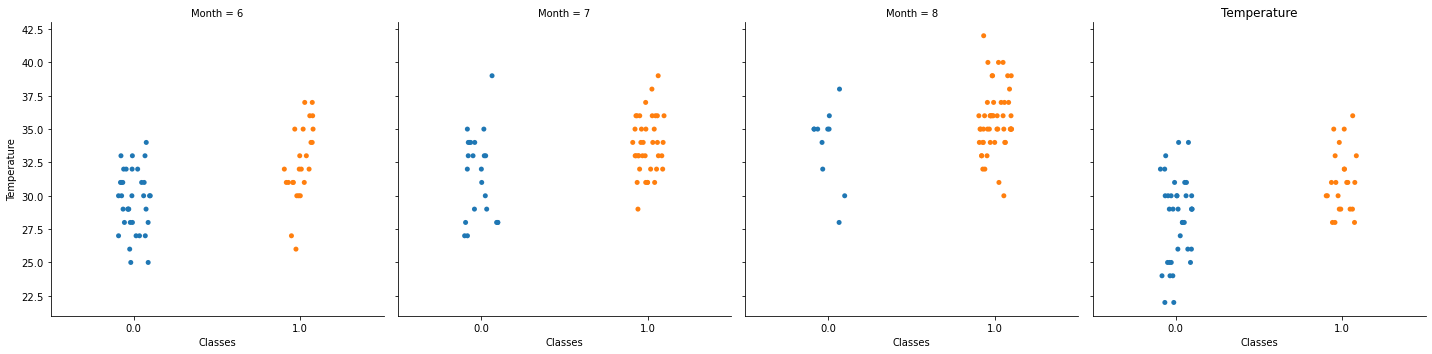

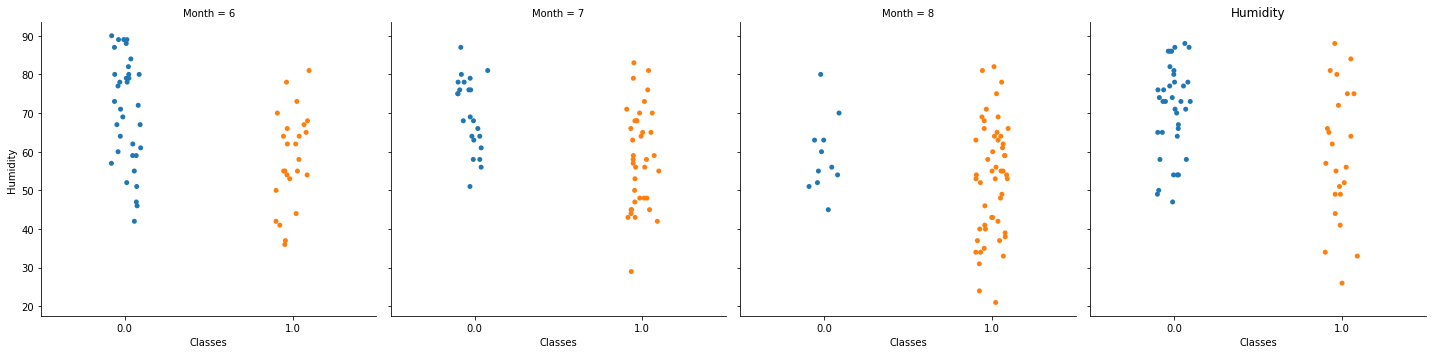

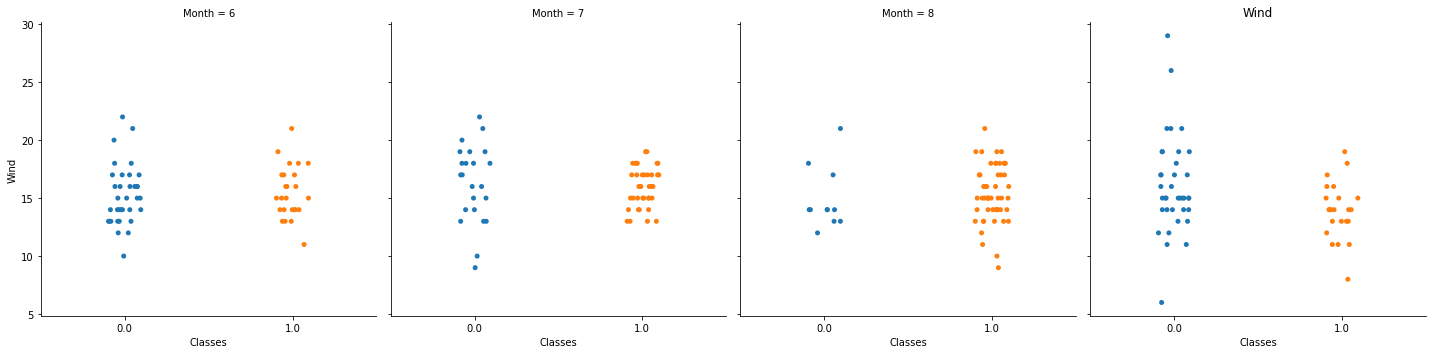

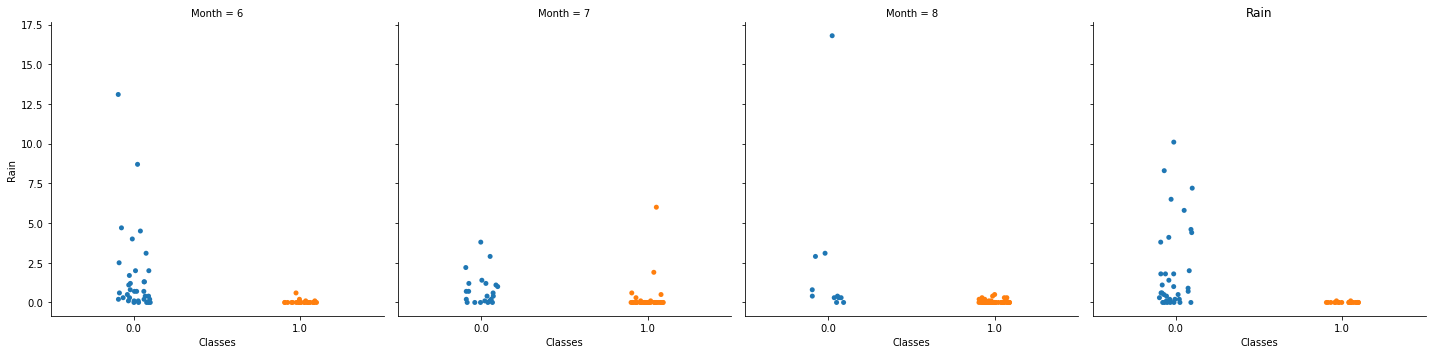

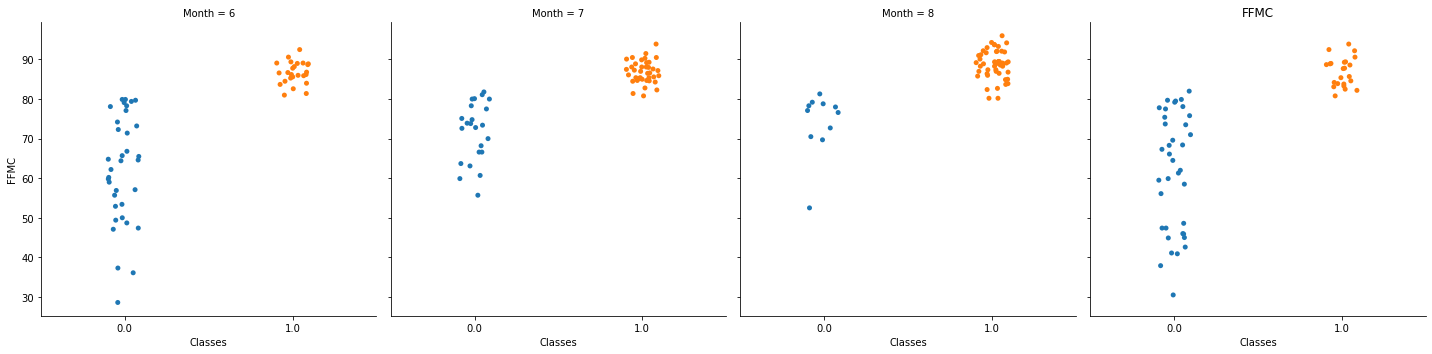

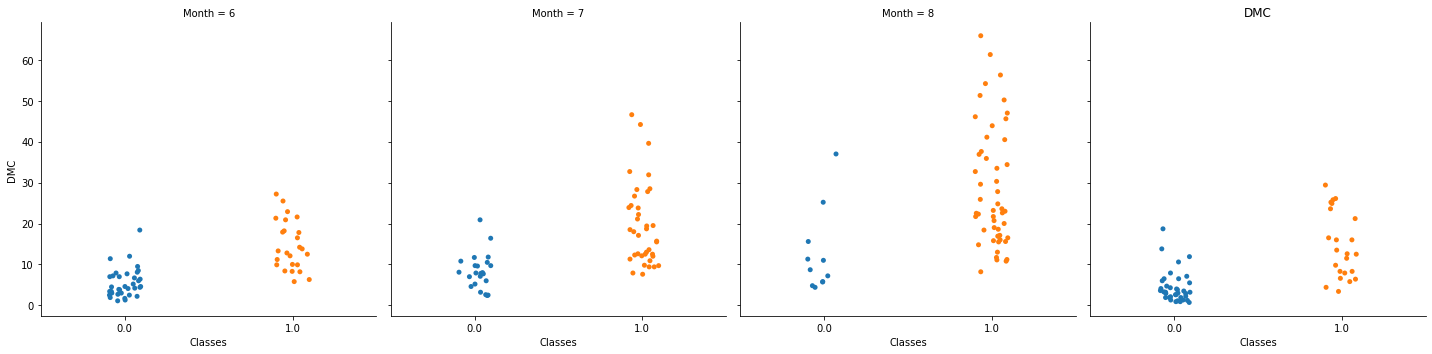

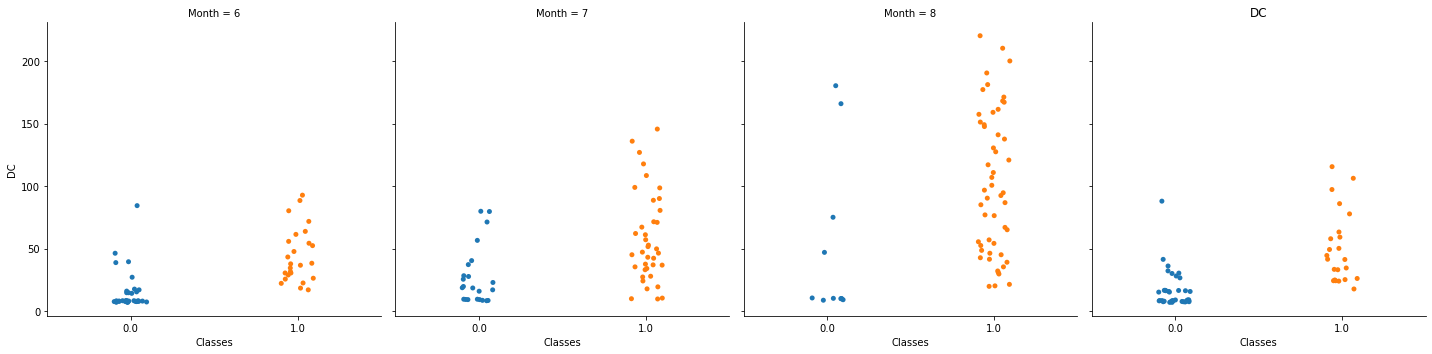

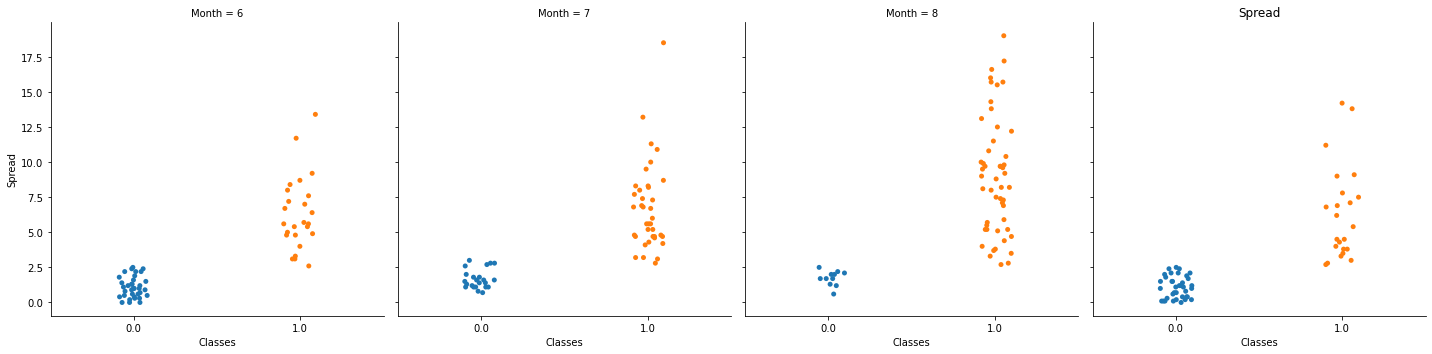

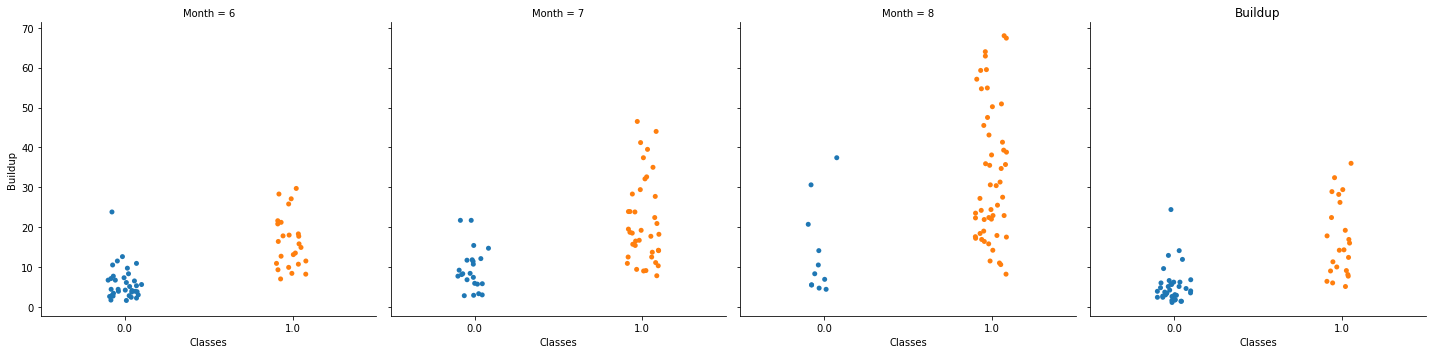

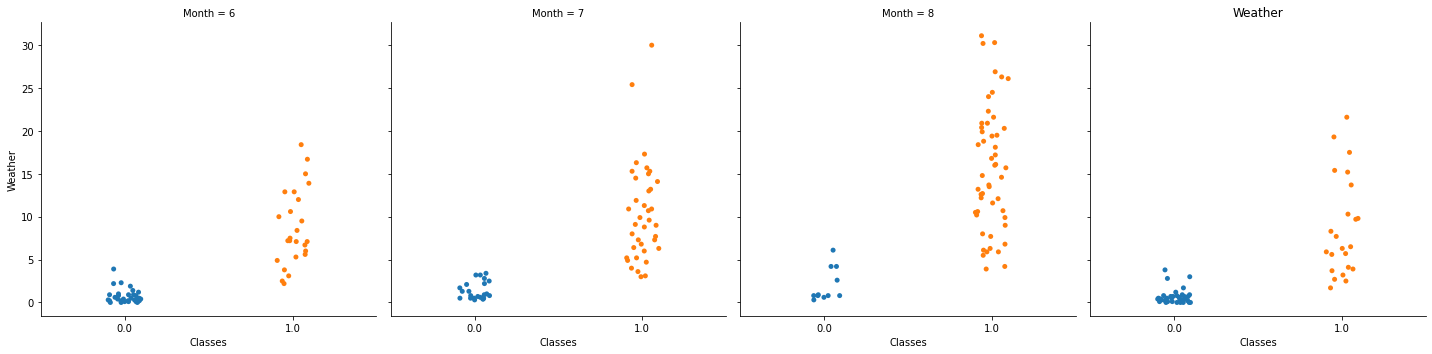

In [466]:
for feature in numeric_features:
    sns.catplot(y = feature, x = 'Classes', col = 'Month',  data = df)
    plt.title(feature)
    plt.show()

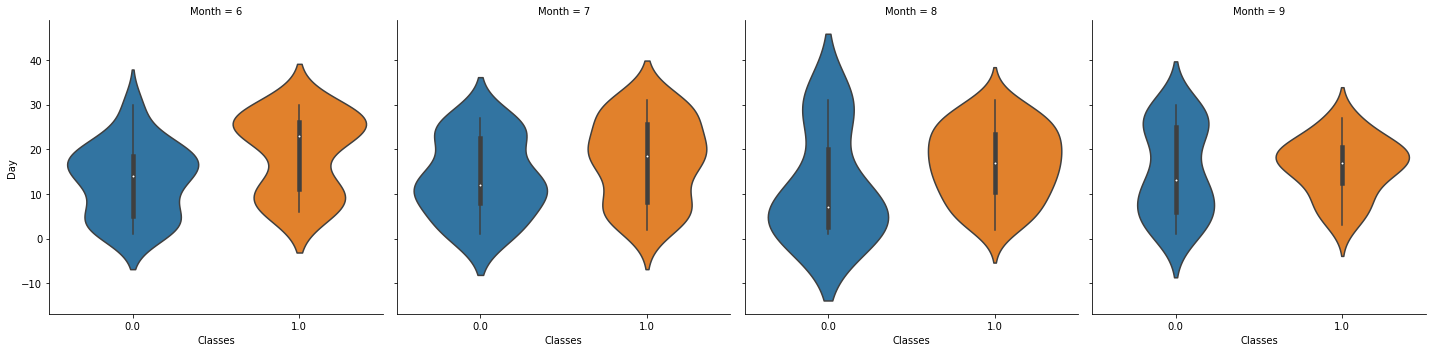

In [454]:
sns.catplot(y = 'Day', x = 'Classes', col = 'Month', kind ='violin',  data = df)

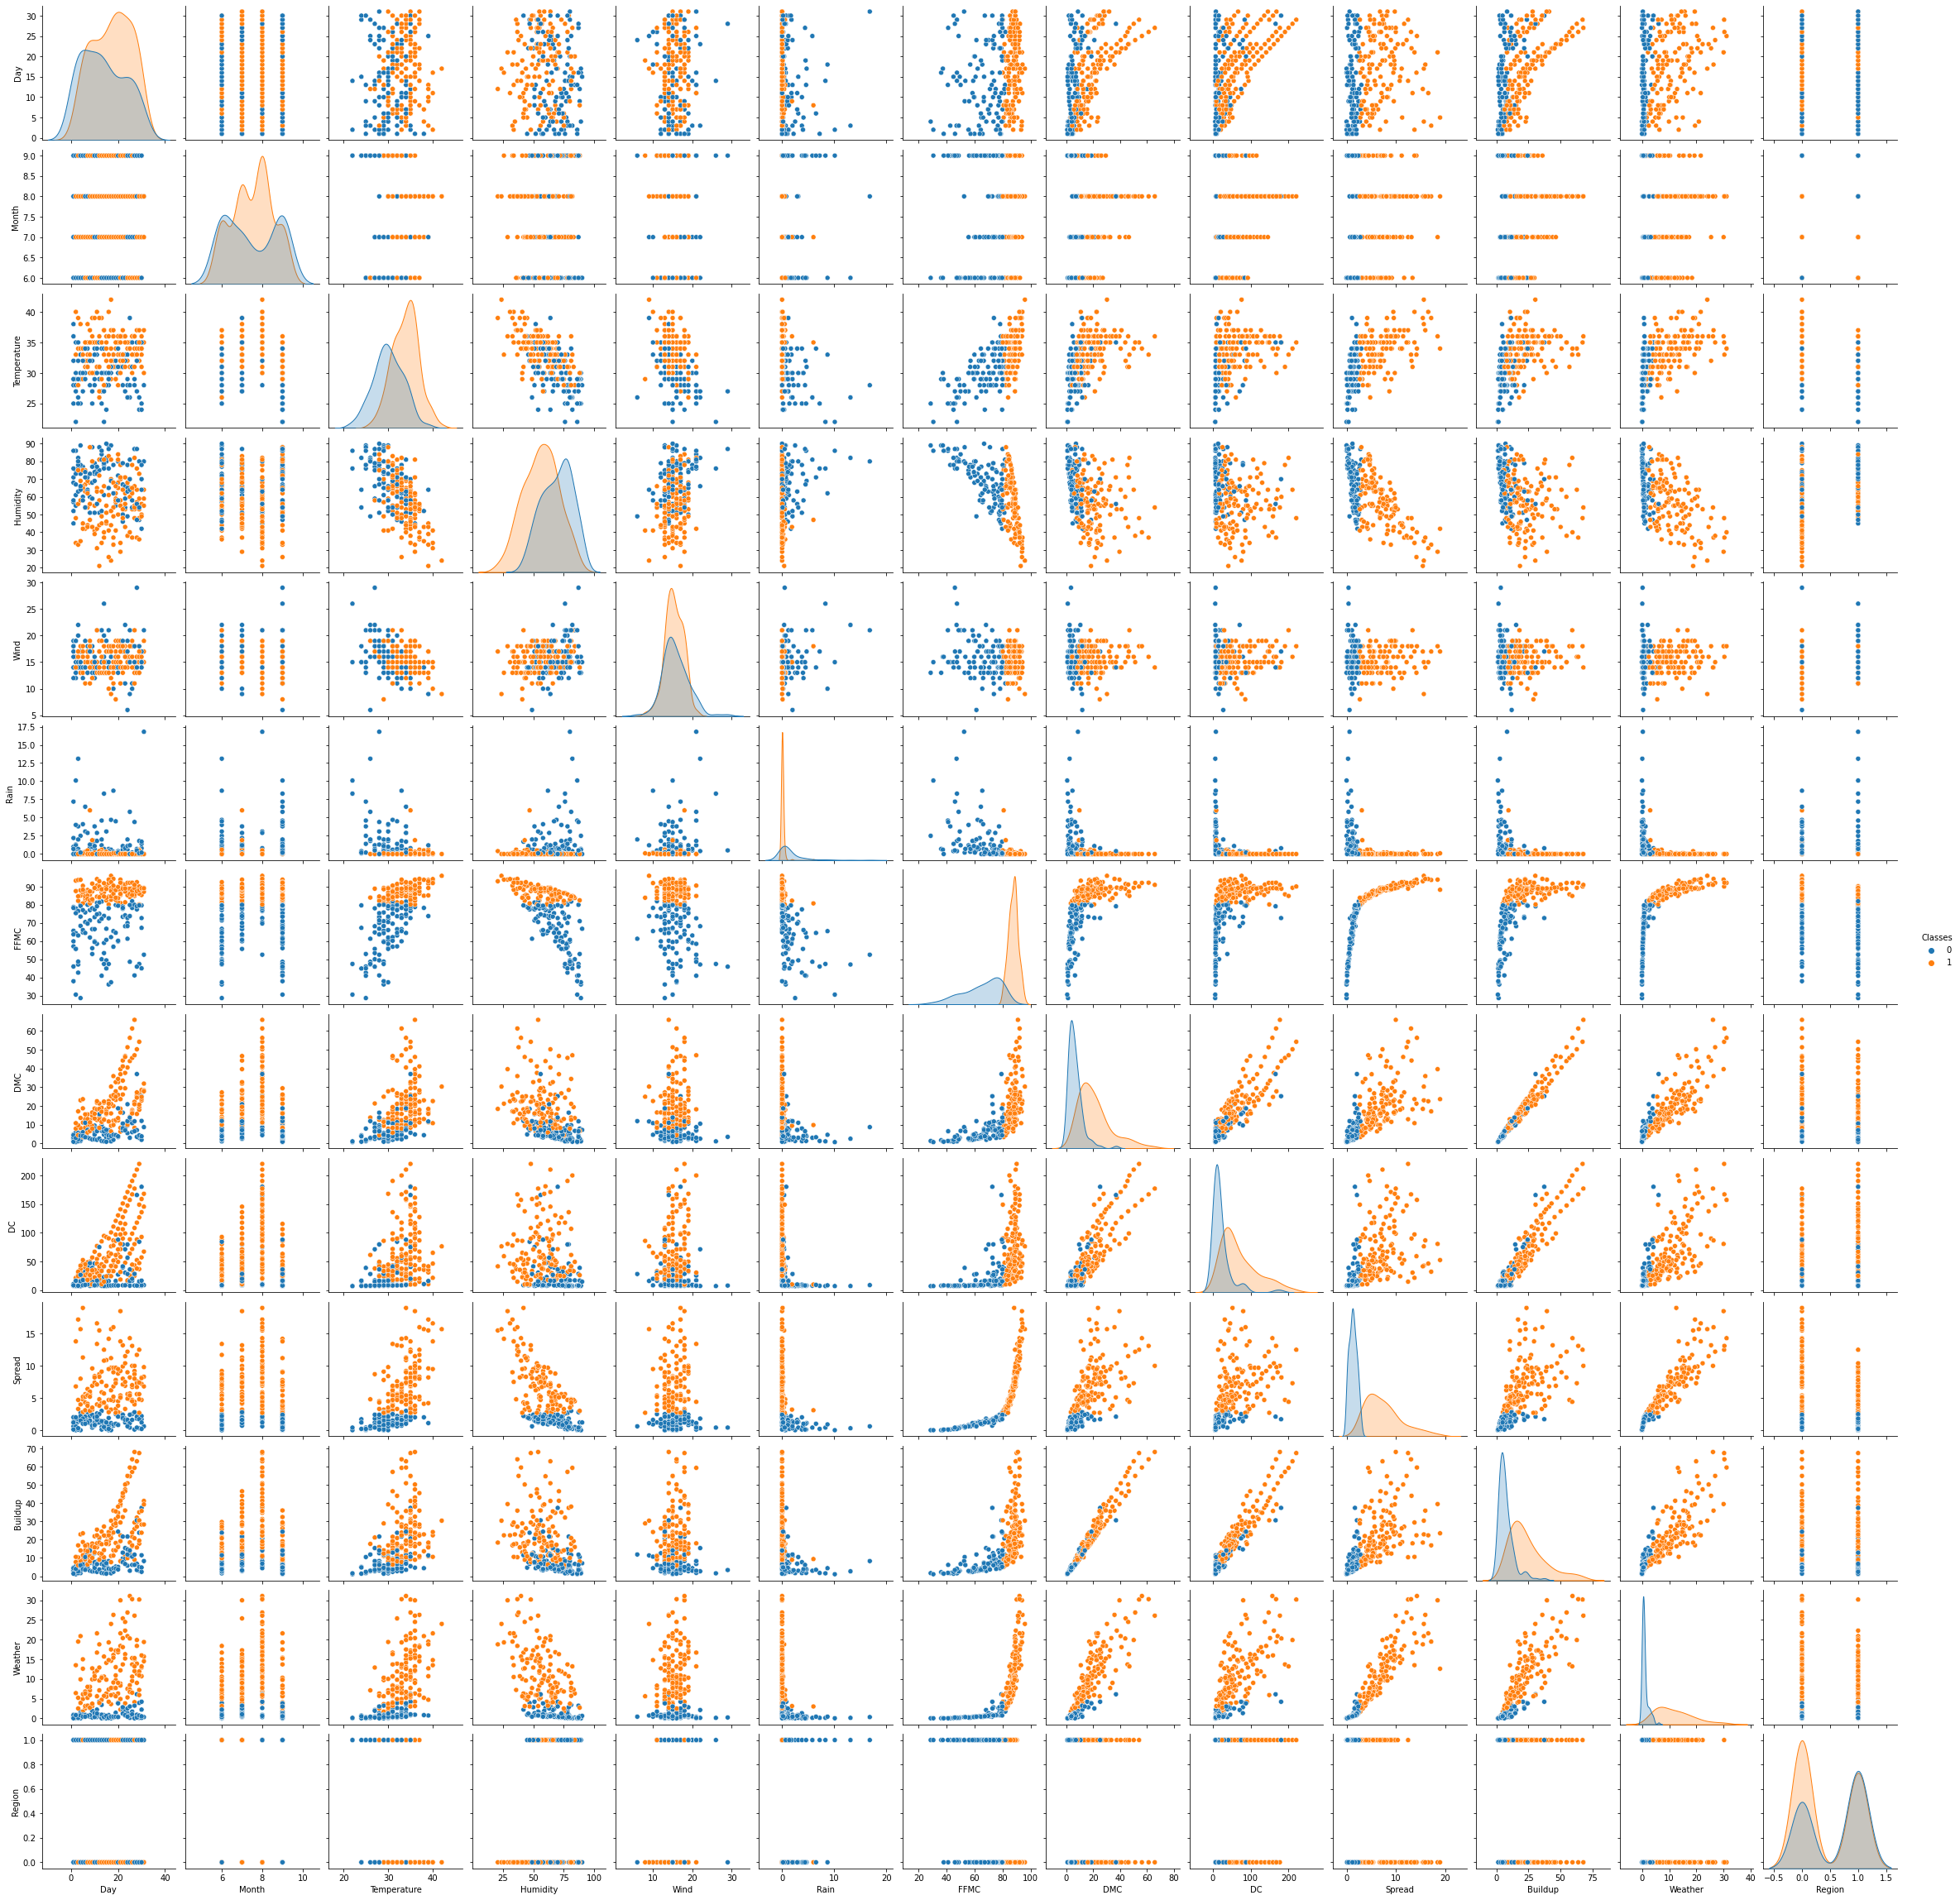

In [467]:
df =data.copy()
p=sns.pairplot(df, hue = 'Classes')

In [417]:
##Encode Classes and Region columns 
df = data.copy()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [441]:
data['Classes'] = data['Classes'].replace(('fire', 'not fire'), (1, 0))


In [446]:
data['Classes'] = data['Classes'].replace(np.NaN, 1)
data['Classes'] = data['Classes'].astype('int')

In [437]:
data['Region'] = data['Region'].replace(('Bejaia', 'Sidi-Bel Abbes'), (1, 0))

In [447]:
data.Classes.unique()

array([0, 1])

In [481]:
##Detecting outliers
df = data.copy()

def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
       
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print( 'critical values are ', mean+3*std, mean-3*std )
    return outliers

print(detect_outliers(df['Wind']))
print(detect_outliers(df['Rain']))
print(detect_outliers(df['DMC']))
print(detect_outliers(df['FFMC']))


critical values are  23.917340049577156 7.090856671734317
[26, 6, 29]
critical values are  6.746568385616938 -5.225256910207103
[13.1, 16.8, 7.2, 10.1, 8.3, 8.7]
critical values are  51.70136576387666 -22.354644452401224
[54.2, 56.3, 61.3, 65.9]
critical values are  120.81218626021129 34.96322357585431
[28.6, 30.5]


In [485]:
#Impute the outliers
data.loc[df['Wind']>=24, 'Wind'] = 24
data.loc[df['Wind']<=7, 'Wind'] = 7

In [484]:
data.loc[df['Rain']>=7, 'Rain'] = 7
data.loc[df['DMC']>=52, 'DMC'] = 52
data.loc[df['FFMC']<=35, 'FFMC'] = 35


array([ 0. ,  1.3, 13.1,  2.5,  0.2,  1.2,  0.5,  3.1,  0.7,  0.6,  0.3,
        0.1,  0.4,  1. ,  1.4,  0.8, 16.8,  7.2, 10.1,  3.8,  0.9,  1.8,
        4.6,  8.3,  5.8,  4. ,  2. ,  4.7,  8.7,  4.5,  1.1,  1.7,  2.2,
        6. ,  1.9,  2.9,  4.1,  6.5,  4.4])

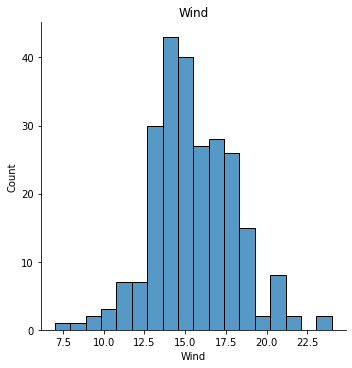

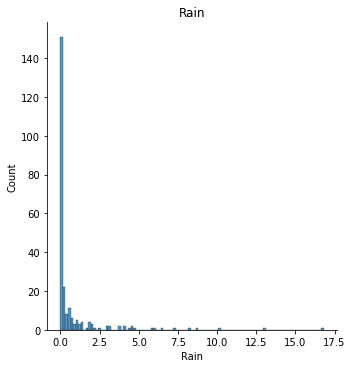

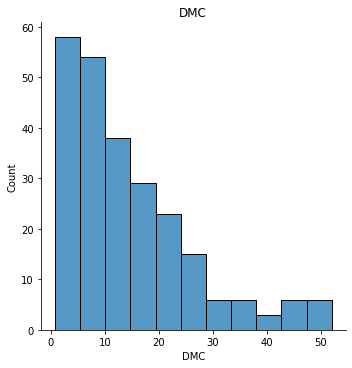

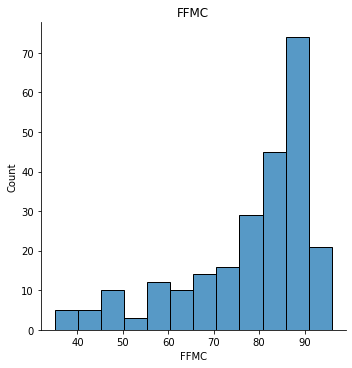

In [489]:
df = data.copy()
for feature in ['Wind', 'Rain', 'DMC', 'FFMC']:
    sns.displot(df[feature])
    plt.title(feature)
    plt.show()

In [490]:
#imbalanced data control
data['Classes'].value_counts()
#The class in an imbalanced classification predictive modeling problem that has slightly more examples. 
#thus, there is no imbalanced data problem, but we can add some sampling in data get equal

1    138
0    106
Name: Classes, dtype: int64

In [491]:
from sklearn.utils import resample
df = data.copy()
#create two different dataframe of majority and minority class 
df_majority = df[(df['Classes']==1)] 
df_minority = df[(df['Classes']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 138, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])


,Day,Month,Temperature,Humidity,Wind,Rain,FFMC,DMC,DC,Spread,Buildup,Weather,Region,Classes
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
104,13,9,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0.0,1,0
214,1,9,29,86,16,0.0,37.9,0.9,8.2,0.1,1.4,0.0,0,0
19,20,6,30,80,16,0.4,59.8,3.4,27.1,0.9,5.1,0.4,1,0
135,14,6,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,19,9,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,0,1
234,21,9,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,0,1
235,22,9,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,0,1
236,23,9,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,0,1


In [499]:
df_upsampled.reset_index(drop = True, inplace = True)
df_upsampled.head()

,Day,Month,Temperature,Humidity,Wind,Rain,FFMC,DMC,DC,Spread,Buildup,Weather,Region,Classes
0,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
1,13,9,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0.0,1,0
2,1,9,29,86,16,0.0,37.9,0.9,8.2,0.1,1.4,0.0,0,0
3,20,6,30,80,16,0.4,59.8,3.4,27.1,0.9,5.1,0.4,1,0
4,14,6,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,0,0


<AxesSubplot:>

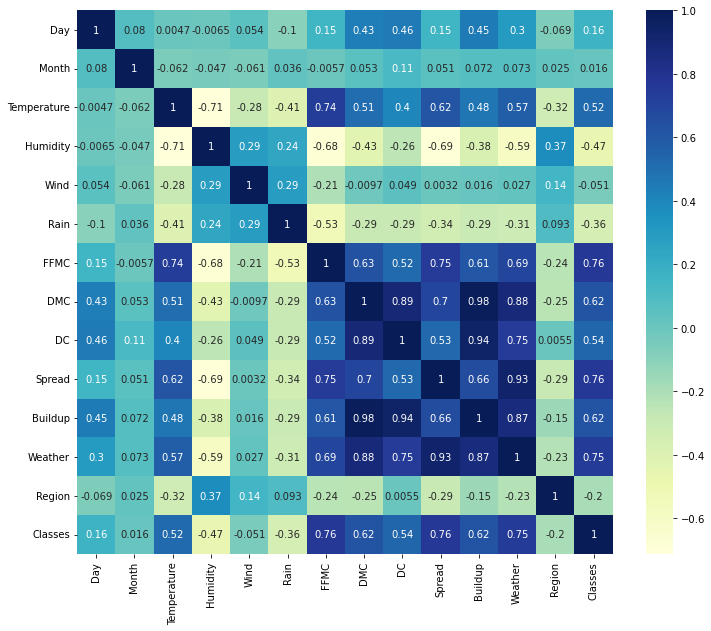

In [500]:
#Multicollinearity check
plt.figure(figsize= (12,10))
sns.heatmap(df_upsampled.corr(), annot = True, cmap = 'YlGnBu')

In [516]:
df_upsampled.drop(index = 219, inplace = True)

In [529]:
 X.columns
column_inc =  ['Day', 'Month',  'Humidity', 'Wind', 'Rain', 
       'DMC', 'DC', 'Spread',   'Region']

In [530]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# creating dummies for gender
# the independent variables set
X = df_upsampled.iloc[:, :-1]
X = X[column_inc]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =column_inc

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


    feature        VIF
0       Day   5.341926
1     Month  25.019714
2  Humidity  35.865956
3      Wind  38.037042
4      Rain   1.534041
5       DMC  21.203655
6        DC  12.913503
7    Spread   7.502191
8    Region   3.177204


In [528]:
df_upsampled.corr()

,Day,Month,Temperature,Humidity,Wind,Rain,FFMC,DMC,DC,Spread,Buildup,Weather,Region,Classes
Day,1.000000,0.079732,0.005673,-0.007797,0.054465,-0.100947,0.148104,0.432959,0.456187,0.147766,0.445778,0.299749,-0.069564,0.160341
Month,0.079732,1.000000,-0.060355,-0.049717,-0.059451,0.035774,-0.004358,0.052448,0.113407,0.055045,0.071120,0.073268,0.023786,0.017627
Temperature,0.005673,-0.060355,1.000000,-0.709267,-0.290143,-0.405917,0.736584,0.512243,0.404871,0.612779,0.480931,0.566483,-0.315683,0.519155
Humidity,-0.007797,-0.049717,-0.709267,1.000000,0.294378,0.242160,-0.680344,-0.437003,-0.262210,-0.688427,-0.384389,-0.587159,0.368150,-0.466232
Wind,0.054465,-0.059451,-0.290143,0.294378,1.000000,0.293285,-0.211929,-0.009610,0.051727,-0.003350,0.017562,0.027182,0.145044,-0.054228
Rain,-0.100947,0.035774,-0.405917,0.242160,0.293285,1.000000,-0.530807,-0.290062,-0.289887,-0.342321,-0.293559,-0.313858,0.091932,-0.356382
FFMC,0.148104,-0.004358,0.736584,-0.680344,-0.211929,-0.530807,1.000000,0.627310,0.526388,0.747436,0.608892,0.692765,-0.234413,0.761835
DMC,0.432959,0.052448,0.512243,-0.437003,-0.009610,-0.290062,0.627310,1.000000,0.887512,0.703853,0.982171,0.880120,-0.250511,0.624371
DC,0.456187,0.113407,0.404871,-0.262210,0.051727,-0.289887,0.526388,0.887512,1.000000,0.536779,0.940979,0.751070,0.003056,0.544111
Spread,0.147766,0.055045,0.612779,-0.688427,-0.003350,-0.342321,0.747436,0.703853,0.536779,1.000000,0.670928,0.928159,-0.280317,0.760165


In [535]:
#final columns are 
column_inc = ['Day', 'Month', 'Humidity', 'Wind', 'Rain', 'DMC', 'DC', 'Spread', 'Region', 'Classes']

In [536]:
#Check point and update the our dataset
df_final = df_upsampled.copy()
df_final = df_final[column_inc]

In [537]:
df_final

,Day,Month,Humidity,Wind,Rain,DMC,DC,Spread,Region,Classes
0,27,9,87,15,4.4,6.5,8.0,0.1,0,0
1,13,9,86,21,4.6,1.3,7.5,0.1,1,0
2,1,9,86,16,0.0,0.9,8.2,0.1,0,0
3,20,6,80,16,0.4,3.4,27.1,0.9,1,0
4,14,6,79,16,0.7,6.4,7.3,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...
271,19,9,41,8,0.1,24.9,86.0,2.7,0,1
272,21,9,34,17,0.0,23.6,97.3,13.8,0,1
273,22,9,64,13,0.0,26.1,106.3,7.1,0,1
274,23,9,56,14,0.0,29.4,115.6,7.5,0,1
